# <center>ENEM - pt. 2
<hr>

## <center>Inicialização
<hr>

In [1]:
%%time

from tcc_funcoes import *

CPU times: user 1.31 s, sys: 66.1 ms, total: 1.38 s
Wall time: 534 ms


In [2]:
%%time

v_arquivos_pickle = [
    ('dc_dfs.pkl', 'dc_dfs'),
    ('dc_preditoras.pkl', 'dc_preditoras'),
    ('dc_target.pkl', 'dc_target'),
    ('edicoes.pkl', 'edicoes')
]

abre_arquivos_pickle(v_arquivos_pickle, globals())

del v_arquivos_pickle
gc.collect()

CPU times: user 31.2 ms, sys: 409 ms, total: 440 ms
Wall time: 475 ms


0

## <center>Análise Exploratória - Notas
<hr>

Para iniciar a análise exploratória, vamos analisar as variáveis respostas, começando pela forma de preenchimento de cada, entendo quais são os valores distintos, a média, mediana, desvio padrão, valores mínimos e máximos.

In [3]:
%%time

### Notas distintas, delta entre notas e estatísticas descritivas

dc_describe = {}

for k, v in dc_dfs.items():

    v_notas = np.sort(v[dc_target[k]].unique())

    v_delta_notas = np.diff(v_notas)

    print("=" * 50)
    print()

    print(f"Notas distintas em {k}:")
    print()

    print(v_notas)
    print(len(v_notas))
    print()

    print(v_delta_notas)
    print()

    dc_describe[k] = v[dc_target[k]].astype('float32').describe()
    print()

df_describe_notas = pd.DataFrame(dc_describe).T

del k, v, v_notas, v_delta_notas, dc_describe
gc.collect()


Notas distintas em Ciências Humanas:

[  0.  290.  293.2 ... 844.  847.  862.5]
1518

[2.90e+02 3.25e+00 2.50e-01 ... 5.00e-01 3.00e+00 1.55e+01]



Notas distintas em Ciências Natureza:

[  0.  307.8 308.2 ... 867.  868.5 875.5]
1499

[3.078e+02 5.000e-01 2.500e-01 ... 8.000e+00 1.500e+00 7.000e+00]



Notas distintas em Linguagem e Código:

[  0.  270.5 270.8 ... 821.  821.5 826. ]
1541

[2.705e+02 2.500e-01 2.500e-01 ... 5.000e-01 5.000e-01 4.500e+00]



Notas distintas em Matemática:

[  0.  310.5 311.  ... 983.  984.  985.5]
1747

[3.105e+02 5.000e-01 2.500e-01 ... 1.500e+00 1.000e+00 1.500e+00]



Notas distintas em Redação:

[   0.   40.   60.   80.  100.  120.  140.  160.  180.  200.  220.  240.
  260.  280.  300.  320.  340.  360.  380.  400.  420.  440.  460.  480.
  500.  520.  540.  560.  580.  600.  620.  640.  660.  680.  700.  720.
  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.  940.  960.
  980. 1000.]
50

[40. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 

0

In [4]:
%%time

df_describe_notas

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 2.62 μs


,count,mean,std,min,25%,50%,75%,max
Ciências Humanas,7895093.0,523.812439,91.312370,0.0,460.00,528.50,588.0,862.5
Ciências Natureza,7500050.0,496.887787,81.460983,0.0,437.25,490.25,552.0,875.5
Linguagem e Código,7895093.0,519.026001,76.939369,0.0,470.00,525.00,573.5,826.0
Matemática,7500050.0,538.655334,121.485405,0.0,441.50,526.00,625.0,985.5
Redação,7895093.0,616.610229,204.658264,0.0,520.00,620.00,760.0,1000.0


In [5]:
%%time

del df_describe_notas
gc.collect()

CPU times: user 23.7 ms, sys: 0 ns, total: 23.7 ms
Wall time: 23.7 ms


0

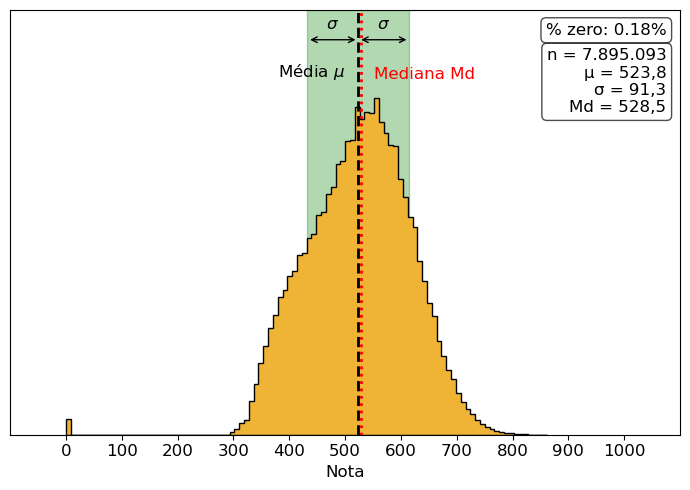

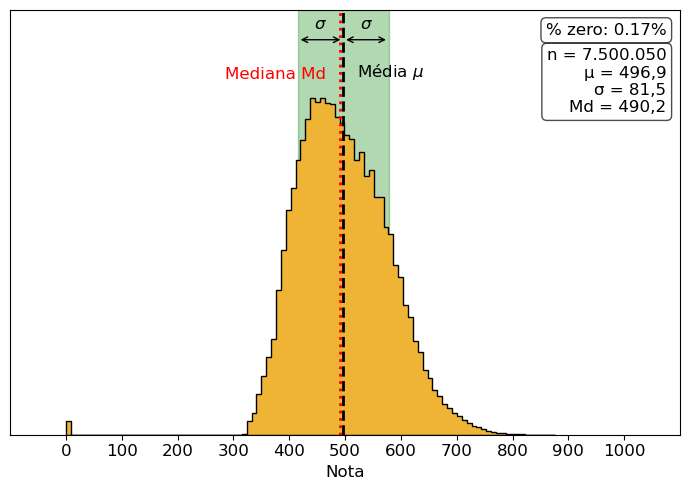

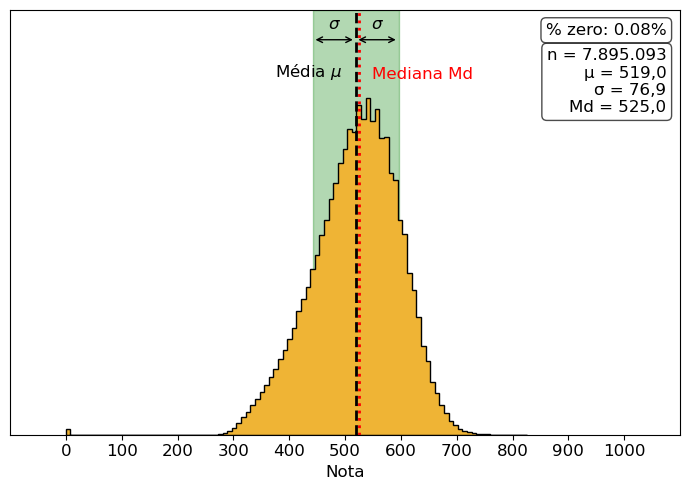

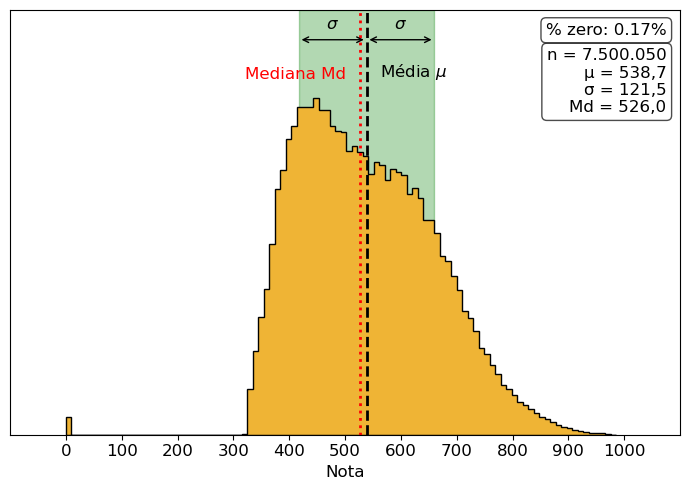

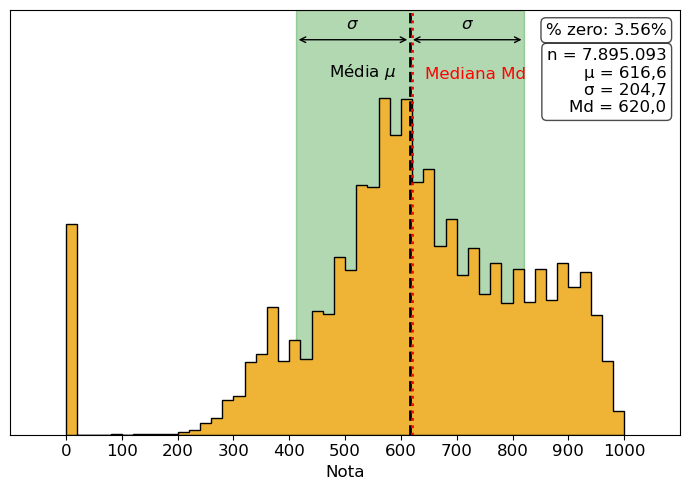

CPU times: user 1.05 s, sys: 30.8 ms, total: 1.08 s
Wall time: 1.09 s


17613

In [6]:
%%time

### Distribuição das notas

dc_nome_salvar = {
    'Ciências Humanas' : 'humanas',
    'Ciências Natureza' : 'natureza',
    'Linguagem e Código' : 'linguagem_codigo',
    'Matemática' : 'matematica',
    'Redação' : 'redacao'
}

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    if nome == 'Redação':
        bins = 50
    else:
        bins = 100

    data = df[target].astype('float32')

    media = data.mean()
    mediana = data.median()
    desv_pad = data.std()
    
    n_str = f"{len(data):,}".replace(",", ".")
    mean_str = f"{media:.1f}".replace(".", ",")
    std_str = f"{desv_pad:.1f}".replace(".", ",")
    med_str = f"{mediana:.1f}".replace(".", ",")

    plt.figure(figsize = (7, 5))

    # plt.title(f"Histograma das notas - {nome}", fontsize = 16)

    plt.xlabel("Nota", fontsize = 12)
    plt.ylabel("")

    plt.xticks(range(0, 1001, 100), fontsize = 12)
    plt.yticks([])

    # área verde do desvio padrão
    plt.axvspan(
        media - desv_pad,
        media + desv_pad,
        color = 'green',
        alpha = 0.3
    )

    # histograma
    plt.hist(
        data,
        bins = bins,
        color = 'xkcd:macaroni and cheese',
        alpha = 1,
        edgecolor = 'black',
        histtype = 'stepfilled'
    )

    # linha da média
    plt.axvline(
        x = media,
        color = 'black',
        linestyle = 'dashed',
        linewidth = 2,
        label = f"Média: {media:.2f}"
    )

    # linha da mediana
    plt.axvline(
        x = mediana,
        color = 'red',
        linestyle = 'dotted',
        linewidth = 2,
        label = f"Mediana: {mediana:.2f}"
    )

    plt.xlim(-100, 1100)
    plt.ylim(0, max(plt.gca().get_ylim()) * 1.2)

    # legenda feita de forma manual
    plt.text(
        0.98, 0.91,
        f"n = {n_str}\nμ = {mean_str}\nσ = {std_str}\nMd = {med_str}",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    # seta direita do desvio padrão
    y_seta = plt.gca().get_ylim()[1] * 0.93

    plt.annotate(
        "",
        xy = (media + desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media + desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # seta esquerda do desvio padrão
    plt.annotate(
        "",
        xy = (media - desv_pad, y_seta),
        xytext = (media, y_seta),
        arrowprops = dict(arrowstyle="<->", color="black", linewidth=1)
    )

    plt.text(
        media - desv_pad / 2,
        y_seta * 1.02,
        r"$\sigma$",
        ha="center",
        va="bottom",
        fontsize=12,
        color="black"
    )

    # Anotações relativas à posição da média e mediana
    x_span = plt.gca().get_xlim()[1] - plt.gca().get_xlim()[0]
    offset = x_span * 0.02

    y_pos = plt.gca().get_ylim()[1] * 0.83

    if mediana > media:
        # mediana à direita, média à esquerda
        plt.gca().text(mediana + offset, y_pos, "Mediana Md", ha='left', va='bottom', fontsize=12, color='red')
        plt.gca().text(media - offset, y_pos, r"Média $\mu$", ha='right', va='bottom', fontsize=12, color='black')
    elif media > mediana:
        # mediana à esquerda, média à direita
        plt.gca().text(mediana - offset, y_pos, "Mediana Md", ha='right', va='bottom', fontsize=12, color='red')
        plt.gca().text(media + offset, y_pos, r"Média $\mu$", ha='left', va='bottom', fontsize=12, color='black')

    # anotação do percentual de zeros

    perc_zeros = (data == 0).sum() / len(data) * 100

    plt.text(
        0.98, 0.97,
        f"% zero: {perc_zeros:.2f}%",
        transform=plt.gca().transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7),
        fontsize=12
    )

    plt.tight_layout()
    plt.savefig(f"../texto/imagens/histograma_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')
    plt.show()

del nome, df, bins, target, media, mediana, desv_pad
del y_seta, x_span, offset, y_pos, data, mean_str
del std_str, med_str, n_str, perc_zeros
gc.collect()


In [7]:
%%time

### Assimetria e Curtose

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    skewness = df[target].astype('float32').skew()
    kurtosis = df[target].astype('float32').kurtosis()

    print(f"{nome} - Assimetria: {skewness:.4f} | Curtose: {kurtosis:.4f}")

print()

del nome, df, target, skewness, kurtosis
gc.collect()

Ciências Humanas - Assimetria: -0.3408 | Curtose: 1.1268
Ciências Natureza - Assimetria: 0.0322 | Curtose: 1.8372
Linguagem e Código - Assimetria: -0.5112 | Curtose: 1.1780
Matemática - Assimetria: 0.3138 | Curtose: 0.0850
Redação - Assimetria: -0.7457 | Curtose: 1.0488

CPU times: user 303 ms, sys: 68 ms, total: 371 ms
Wall time: 370 ms


0

In [8]:
%%time

### Teste de hipótese de que as médias das notas são iguais entre as edições

from scipy.stats import f_oneway

for nome, df in dc_dfs.items():
    
    print("=" * 50)
    print()

    print(f"Análise para: {nome}")
    print()
    
    target = dc_target[nome]

    grupos = [df.loc[df['edicao'] == e, target].values.astype('float32') for e in edicoes]

    medias_por_ano = [np.mean(g) for g in grupos]
    diff_maxima = max(medias_por_ano) - min(medias_por_ano)

    print(f"Médias por edição: {[round(m, 2) for m in medias_por_ano]}")
    print(f"Diferença máxima encontrada: {diff_maxima:.2f} pontos")

    # Estatística F
    stat, p_value = f_oneway(*grupos)
    alpha = 0.001

    print(f"Estatística F: {stat:.4f}")
    print(f"p-valor: {p_value:.4e}")

    # Tamanho do Efeito - Standardized mean difference

    desvio_padrao = df[target].astype('float32').std()
    smd = diff_maxima / desvio_padrao

    print(f"Tamanho do efeito (SMD): {smd:.4f}")

    # Conclusão do teste de hipótese
    if p_value < alpha:
        print(">> Resultado Estatístico: Rejeita-se H0 (Diferença significativa detectada).")
    else:
        print(">> Resultado Estatístico: Não se rejeita H0 (Médias iguais).")

    # Interpretação do tamanho do efeito
    if smd < 0.2:
        interpretacao = "Insignificante"
    elif smd < 0.5:
        interpretacao = "Pequeno"
    elif smd < 0.8:
        interpretacao = "Médio"
    else:
        interpretacao = "Grande"
        
    print(f">> Conclusão Prática: O tamanho do efeito é **{interpretacao}**")
    print()

print("=" * 50)

del nome, df, target, grupos, stat, p_value, alpha, medias_por_ano, diff_maxima
del desvio_padrao, smd, interpretacao
gc.collect()


Análise para: Ciências Humanas

Médias por edição: [np.float32(514.02), np.float32(523.13), np.float32(530.91), np.float32(527.72)]
Diferença máxima encontrada: 16.89 pontos
Estatística F: 13161.1094
p-valor: 0.0000e+00
Tamanho do efeito (SMD): 0.1850
>> Resultado Estatístico: Rejeita-se H0 (Diferença significativa detectada).
>> Conclusão Prática: O tamanho do efeito é **Insignificante**


Análise para: Ciências Natureza

Médias por edição: [np.float32(493.05), np.float32(494.9), np.float32(499.43), np.float32(500.11)]
Diferença máxima encontrada: 7.06 pontos
Estatística F: 3431.3857
p-valor: 0.0000e+00
Tamanho do efeito (SMD): 0.0866
>> Resultado Estatístico: Rejeita-se H0 (Diferença significativa detectada).
>> Conclusão Prática: O tamanho do efeito é **Insignificante**


Análise para: Linguagem e Código

Médias por edição: [np.float32(526.16), np.float32(505.49), np.float32(521.18), np.float32(521.82)]
Diferença máxima encontrada: 20.67 pontos
Estatística F: 26507.4805
p-valor: 0.

0

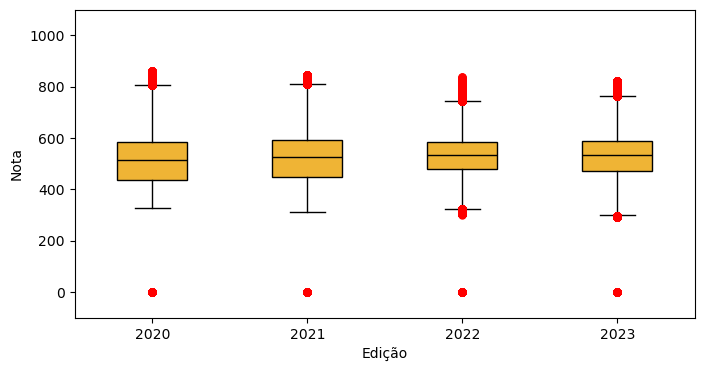

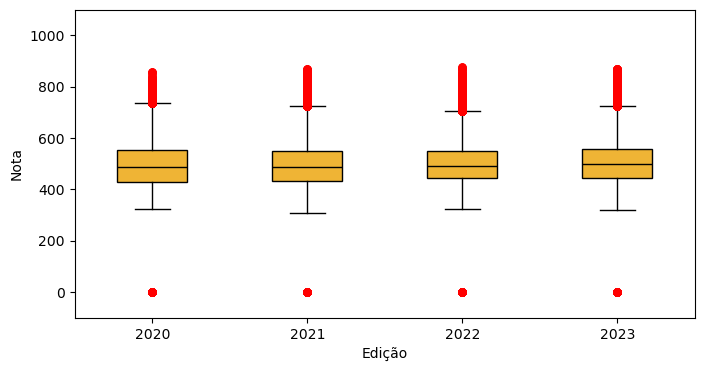

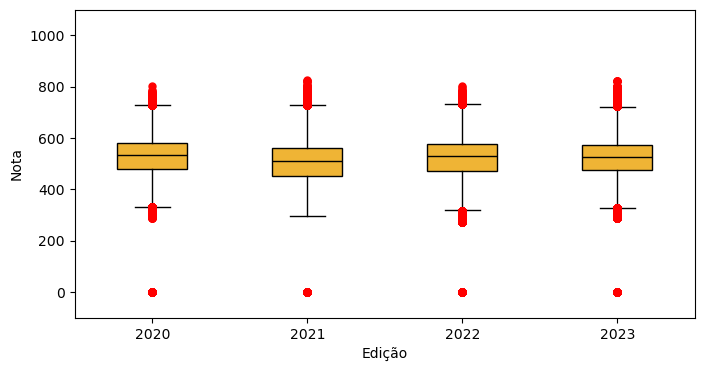

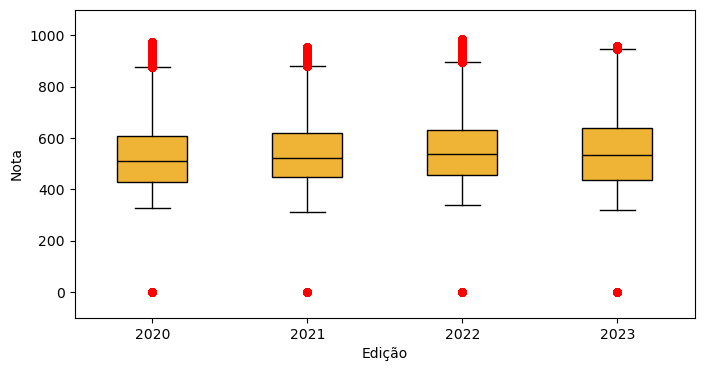

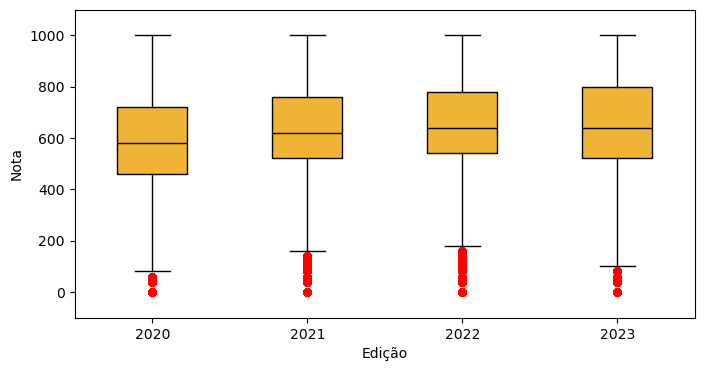

CPU times: user 2.04 s, sys: 9.78 ms, total: 2.05 s
Wall time: 2.06 s


12270

In [9]:
%%time

### Boxplot

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    plt.figure(figsize = (8, 4))

    # agrupar por edição e criar boxplot por edição
    data = [df.loc[df['edicao'] == e, target].values.astype('float32') for e in edicoes]

    plt.boxplot(
        data,
        vert = True,
        patch_artist = True,
        tick_labels = edicoes,
        boxprops = dict(facecolor = 'xkcd:macaroni and cheese', color = 'black'),
        medianprops = dict(color = 'black'),
        whiskerprops = dict(color = 'black'),
        capprops = dict(color = 'black'),
        flierprops = dict(markerfacecolor = 'red', markeredgecolor = 'red', markersize = 5, marker = 'o')
    )

    plt.ylim(-100,1100)
    plt.yticks(range(0, 1001, 200))

    plt.xlabel("Edição")
    plt.ylabel("Nota")
    # plt.title(f"Boxplot das notas por edição - {nome}")
    plt.savefig(f"../texto/imagens/boxplot_{dc_nome_salvar[nome]}.png", dpi=300, bbox_inches='tight')
    plt.show()

del nome, df, target, data
gc.collect()

Uma vez que as notas não são diferentes de forma significativa entre as edições, iremos retirar a variável 'edicao' dos conjuntos de dados preditores.

In [10]:
for k, v in dc_dfs.items():

    v.drop(columns = ['edicao'], inplace = True)

for k, v in dc_preditoras.items():

    v.remove('edicao')

In [11]:
%%time

### Percentual de outliers

dc_limites_outliers = {}

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    total = len(df)

    quartil_1 = df[target].quantile(0.25)
    quartil_3 = df[target].quantile(0.75)
    i_q_r = quartil_3 - quartil_1

    limite_inferior = max(quartil_1 - 1.5 * i_q_r, 0)
    limite_superior = min(quartil_3 + 1.5 * i_q_r, 1000)

    dc_limites_outliers[nome] = (limite_inferior, limite_superior)

    outliers_abaixo = df[(df[target] < limite_inferior)]
    outliers_acima = df[(df[target] > limite_superior)]

    print("=" * 50)
    print()

    print(f"Outliers - {nome}")
    print()

    print(f"Limite Superior: {limite_superior:.2f}")
    print(f"Limite Inferior: {limite_inferior:.2f}")
    print()

    print(f"Superiores: {len(outliers_acima):,} ({len(outliers_acima) / total:.2%})")
    print(f"Inferiores: {len(outliers_abaixo):,} ({len(outliers_abaixo) / total:.2%})")
    print(f"Total: {len(outliers_acima) + len(outliers_abaixo):,} ({(len(outliers_acima) + len(outliers_abaixo)) / total:.2%})")
    print()

print("=" * 50)

del target, total, quartil_1, quartil_3, i_q_r
del limite_inferior, limite_superior, outliers_abaixo, outliers_acima, nome, df
gc.collect()


Outliers - Ciências Humanas

Limite Superior: 780.00
Limite Inferior: 268.00

Superiores: 5,648 (0.07%)
Inferiores: 13,969 (0.18%)
Total: 19,617 (0.25%)


Outliers - Ciências Natureza

Limite Superior: 724.12
Limite Inferior: 265.12

Superiores: 35,931 (0.48%)
Inferiores: 12,615 (0.17%)
Total: 48,546 (0.65%)


Outliers - Linguagem e Código

Limite Superior: 728.75
Limite Inferior: 314.75

Superiores: 3,213 (0.04%)
Inferiores: 32,426 (0.41%)
Total: 35,639 (0.45%)


Outliers - Matemática

Limite Superior: 900.25
Limite Inferior: 166.25

Superiores: 14,919 (0.20%)
Inferiores: 12,848 (0.17%)
Total: 27,767 (0.37%)


Outliers - Redação

Limite Superior: 1000.00
Limite Inferior: 160.00

Superiores: 0 (0.00%)
Inferiores: 282,438 (3.58%)
Total: 282,438 (3.58%)

CPU times: user 898 ms, sys: 782 μs, total: 899 ms
Wall time: 898 ms


0

Na análise de outliers, usando o critério de 1.5 vezes o intervalo interquartil, na nora da redação as notas 1000 foram consideradas como não-outliers. Porém, analisando a distribuição das notas e conhecendo o contexto do ENEM, sabemos que as notas máximas, por mais que sejam válidas, são incomuns e podem ser consideradas outliers para o nosso problema.

In [12]:
%%time

### Ajuste limite superior da Redação

dc_limites_outliers['Redação'] = (dc_limites_outliers['Redação'][0], 980)

### Retirando os outliers

for nome, df in dc_dfs.items():

    target = dc_target[nome]

    limite_inferior, limite_superior = dc_limites_outliers[nome]

    antes = df.shape[0]

    dc_dfs[nome] = df[(df[target] >= limite_inferior) & (df[target] <= limite_superior)].copy()

    depois = dc_dfs[nome].shape[0]

    print(f"{nome}: {antes - depois:,} linhas removidas como outliers ({(antes - depois) / antes:.2%})")

del nome, df, target, limite_inferior, limite_superior, antes, depois, dc_limites_outliers
gc.collect()

Ciências Humanas: 19,617 linhas removidas como outliers (0.25%)
Ciências Natureza: 48,546 linhas removidas como outliers (0.65%)
Linguagem e Código: 35,639 linhas removidas como outliers (0.45%)
Matemática: 27,767 linhas removidas como outliers (0.37%)
Redação: 282,554 linhas removidas como outliers (3.58%)
CPU times: user 1.02 s, sys: 68.6 ms, total: 1.09 s
Wall time: 1.09 s


0

## $$\texttt{pickle}$$
<hr>

In [13]:
%%time

salva_arquivo_pickle(
    'dados/pickle/dc_dfs_sem_outliers.pkl',
    dc_dfs
)

salva_arquivo_pickle(
    'dados/pickle/dc_nome_salvar.pkl',
    dc_nome_salvar
)

CPU times: user 363 ms, sys: 673 ms, total: 1.04 s
Wall time: 3.49 s


In [ ]:
exit()

: 